In [1]:
import pandas as pd 
data=pd.read_csv(r"E:\Data analysis CLS\hospital_patient_records.csv")
data

,PatientID,Name,Age,Gender,Diagnosis,Medication,AdmissionDate,DischargeDate,Doctor,Department,Status
0,2001,John Doe,45,Male,Hypertension,Med A,2025-01-10,2025-01-15,Dr. Smith,Cardiology,Admitted
1,2002,Jane Smith,forty-five,Female,Diabetes,Med B,10/01/2025,15/01/2025,Dr. Lee,Endocrinology,admitted
2,2003,Bob Brown,55,Male,Asthma,Med C,"January 10, 2025","January 15, 2025",Dr. Carter,Pulmonology,Under Observation
3,2004,NaN,30,Female,Flu,Med D,2025-02-05,2025-02-10,NaN,General Medicine,DISCHARGED
4,2005,Tom Wilson,62,Male,Heart Disease,Med E,2025-03-01,2025-03-10,Dr. Johnson,Cardiology,Discharged
5,2006,Susan Clark,49,Female,Kidney Disease,Med F,2025-04-12,2025-04-17,Dr. Patel,Nephrology,Admitted
6,2007,David Jones,37,Male,Pneumonia,Med G,2025-05-20,2025-05-25,Dr. Martinez,Pulmonology,admitted
7,2008,Nancy Miller,28,Female,Flu,Med D,2025-06-15,2025-06-20,Dr. Smith,General Medicine,Under Observation
8,2009,Michael Scott,40,Male,Hypertension,Med A,2025-07-01,2025-07-07,Dr. Smith,Cardiology,Admitted
9,2010,Pam Beesly,34,Female,Diabetes,Med B,2025-08-10,2025-08-15,Dr. Lee,Endocrinology,Discharged


In [2]:
data['Age'] = data['Age'].replace('forty-five', 45)
data['Doctor'] = data['Doctor'].fillna("Unknown")
data['Name'] = data['Name'].fillna("Unknown")
data['Status']=data['Status'].str.lower()
data['Department']=data['Department'].str.lower()
data['AdmissionDate'] = data['AdmissionDate'].fillna(pd.Timestamp('2025-01-10'))
data['DischargeDate'] = data['DischargeDate'].fillna(pd.Timestamp('2025-01-15'))
data['DischargeDate']=pd.to_datetime(data['DischargeDate'],errors='coerce')
data['AdmissionDate']=pd.to_datetime(data['AdmissionDate'],errors='coerce')
data

,PatientID,Name,Age,Gender,Diagnosis,Medication,AdmissionDate,DischargeDate,Doctor,Department,Status
0,2001,John Doe,45,Male,Hypertension,Med A,2025-01-10,2025-01-15,Dr. Smith,cardiology,admitted
1,2002,Jane Smith,45,Female,Diabetes,Med B,NaT,NaT,Dr. Lee,endocrinology,admitted
2,2003,Bob Brown,55,Male,Asthma,Med C,NaT,NaT,Dr. Carter,pulmonology,under observation
3,2004,Unknown,30,Female,Flu,Med D,2025-02-05,2025-02-10,Unknown,general medicine,discharged
4,2005,Tom Wilson,62,Male,Heart Disease,Med E,2025-03-01,2025-03-10,Dr. Johnson,cardiology,discharged
5,2006,Susan Clark,49,Female,Kidney Disease,Med F,2025-04-12,2025-04-17,Dr. Patel,nephrology,admitted
6,2007,David Jones,37,Male,Pneumonia,Med G,2025-05-20,2025-05-25,Dr. Martinez,pulmonology,admitted
7,2008,Nancy Miller,28,Female,Flu,Med D,2025-06-15,2025-06-20,Dr. Smith,general medicine,under observation
8,2009,Michael Scott,40,Male,Hypertension,Med A,2025-07-01,2025-07-07,Dr. Smith,cardiology,admitted
9,2010,Pam Beesly,34,Female,Diabetes,Med B,2025-08-10,2025-08-15,Dr. Lee,endocrinology,discharged


In [3]:
data.isnull().sum()

PatientID        0
Name             0
Age              0
Gender           0
Diagnosis        0
Medication       0
AdmissionDate    2
DischargeDate    2
Doctor           0
Department       0
Status           0
dtype: int64

In [4]:
import matplotlib.pyplot as plt

In [5]:
data[data.duplicated()]

,PatientID,Name,Age,Gender,Diagnosis,Medication,AdmissionDate,DischargeDate,Doctor,Department,Status


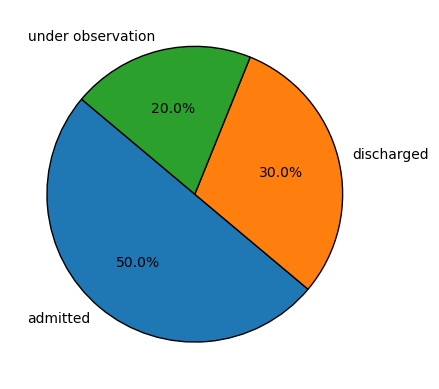

In [6]:
status_counts = data['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.show()

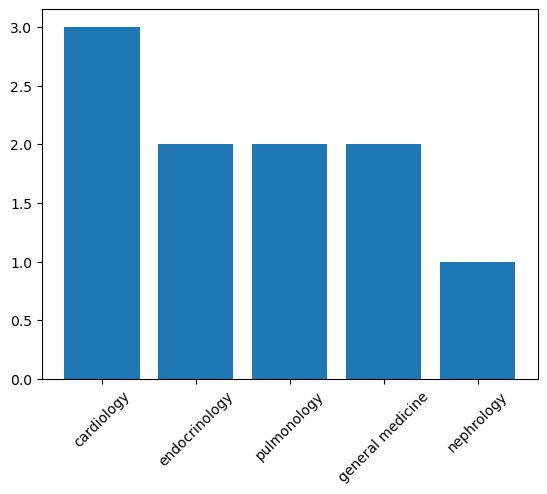

In [7]:
Department = data['Department'].value_counts()

plt.bar(Department.index, Department)
plt.xticks(rotation=45)
plt.show()

In [8]:
data.to_csv('output.csv', index=False)